In [1]:
#Project: Car Price Prediction
#Programmer Name: Jong Won Lim

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [2]:
#Reading the datasets
data = pd.read_csv('car_price_1.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data2 = pd.read_csv('car_price_2.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
#Check if there are null data in the datasets
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
data2.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
#Many null data were found in the second dataset.
#Drop these columns.
del data2['engine']
del data2['max_power']
del data2['torque']
del data2['seats']
del data2['mileage']

In [9]:
#Outer merging two datasets into one
final = pd.merge(data, data2, on=["name", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", "owner"], how='outer')

In [10]:
#Dropping NAN values
final = final.dropna()

In [11]:
final.drop_duplicates(subset=None, keep="first", inplace=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10453 entries, 0 to 12419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10453 non-null  object
 1   year           10453 non-null  int64 
 2   selling_price  10453 non-null  int64 
 3   km_driven      10453 non-null  int64 
 4   fuel           10453 non-null  object
 5   seller_type    10453 non-null  object
 6   transmission   10453 non-null  object
 7   owner          10453 non-null  object
dtypes: int64(3), object(5)
memory usage: 735.0+ KB


In [12]:
#Changing the values of "name" column to "brand", to find the correlation between a specific brand and its price, not a specific model
final["brand"] = final.name.apply(lambda x: x.split()[0])
first_column = final.pop("brand")
final.insert(0, 'brand', first_column)

In [13]:
#Delete "name" column, and renaming some columns
del final['name']
final = final.rename(columns={'selling_price': 'price'})
final.head()

,brand,year,price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
3,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
5,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
7,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
10,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


<AxesSubplot:>

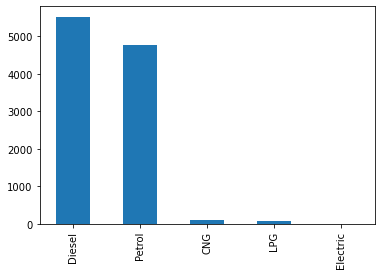

In [14]:
final['fuel'].value_counts().plot(kind='bar')

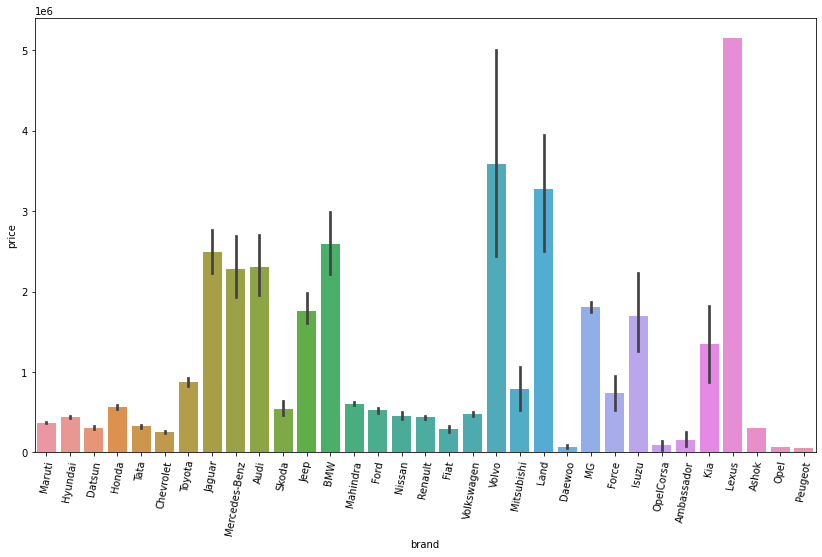

In [15]:
#Plotting a barplot that shows the correlation between 'brand' and 'price'
plt.figure(figsize = (14,8))
plot = sns.barplot(y='price', x='brand', data = final)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

In [16]:
#Checking brands that have low counts but high prices.
print(final['brand'].value_counts())

Maruti           3227
Hyundai          1900
Mahindra         1049
Tata              952
Honda             573
Ford              562
Toyota            526
Chevrolet         364
Renault           316
Volkswagen        266
Nissan            125
Skoda             119
Datsun             86
Fiat               75
BMW                72
Mercedes-Benz      66
Audi               64
Jeep               25
Mitsubishi         16
Jaguar             13
Volvo              13
Land                8
Ambassador          7
MG                  5
Force               5
Isuzu               5
Daewoo              4
Kia                 4
OpelCorsa           2
Lexus               1
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64


In [17]:
final[final['brand'].str.contains("Lexus")]

,brand,year,price,km_driven,fuel,seller_type,transmission,owner
4507,Lexus,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner


In [18]:
#Delete data points that don't have enough data.
final = final[final['brand'].str.contains("Mitsubishi|Jaguar|Volvo|Land|Kia|Ambassador|MG|Force|Isuzu|Daewoo|Kia|OpelCorsa|Lexus|Ashok|Opel|Peugeot") == False]
final = final[final['owner'] != "Test Drive Car"]
final = final[final['fuel'] != "Electric"]

final.reset_index(drop=True, inplace=True)

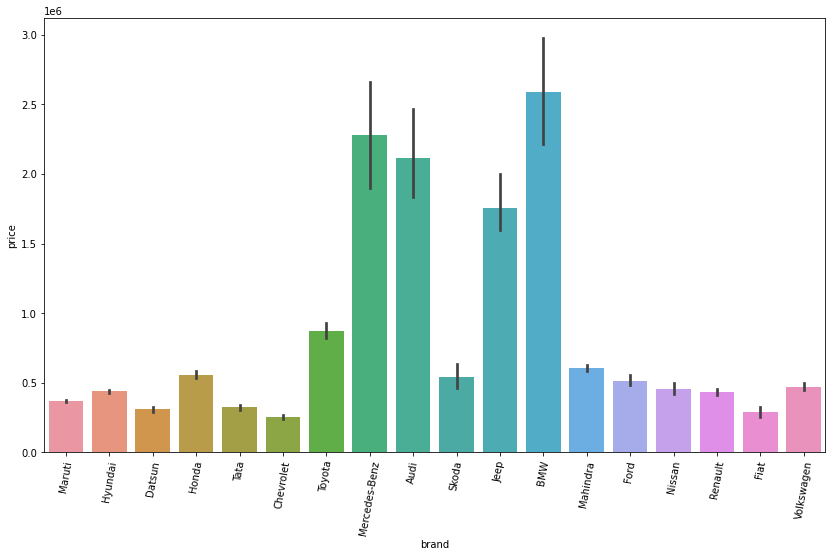

In [19]:
plt.figure(figsize = (14,8))
plot = sns.barplot(y='price', x='brand', data = final)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

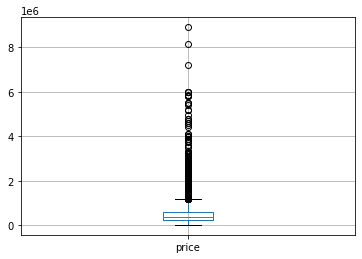

In [20]:
#Checking outliers using boxplots
A = final.boxplot(column = 'price')

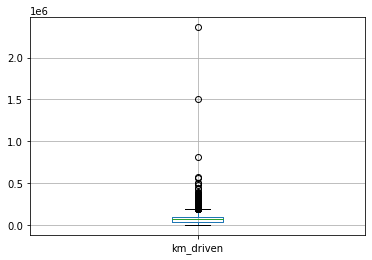

In [21]:
B = final.boxplot(column = 'km_driven')

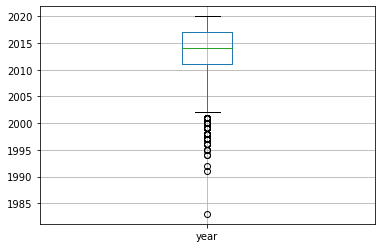

In [22]:
C = final.boxplot(column = 'year')

In [23]:
#Dropping the rows that possibly have outlying values
final.drop(final[final['km_driven'] >= 1000000].index, inplace = True)
final.drop(final[final['year'] <= 1990].index, inplace = True)
final2 = final

In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 0 to 10344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         10342 non-null  object
 1   year          10342 non-null  int64 
 2   price         10342 non-null  int64 
 3   km_driven     10342 non-null  int64 
 4   fuel          10342 non-null  object
 5   seller_type   10342 non-null  object
 6   transmission  10342 non-null  object
 7   owner         10342 non-null  object
dtypes: int64(3), object(5)
memory usage: 727.2+ KB


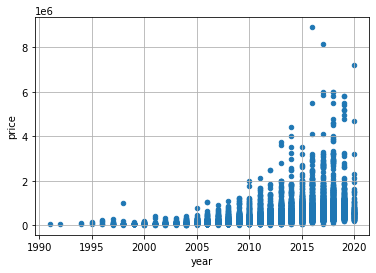

In [25]:
final.plot(kind = "scatter", x = 'year', y = 'price')
plt.grid()

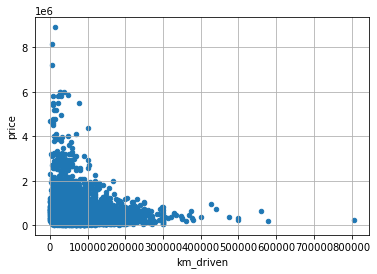

In [26]:
final.plot(kind = "scatter", x = 'km_driven', y = 'price')
plt.grid()

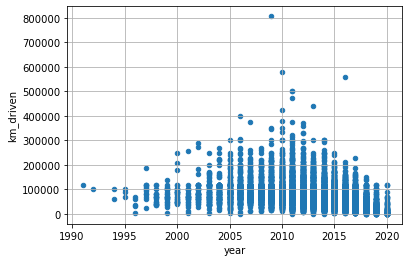

In [27]:
final.plot(kind = "scatter", x = 'year', y = 'km_driven')
plt.grid()

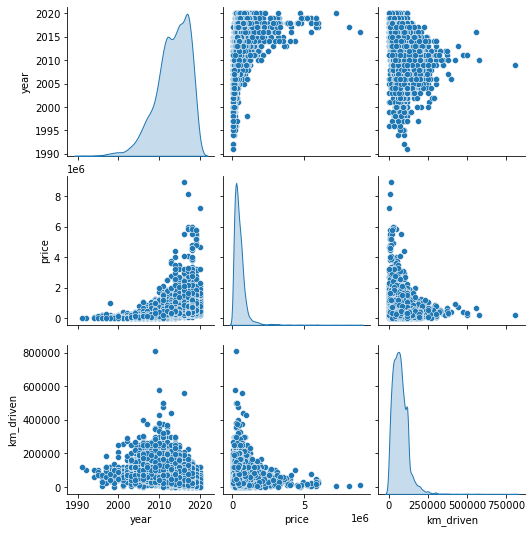

In [28]:
sns.pairplot(data= final, diag_kind='kde')

In [29]:
#Encoding the string values to numeric values
print(final['fuel'].value_counts())
print(final['seller_type'].value_counts())
print(final['transmission'].value_counts())
print(final['owner'].value_counts())

Diesel    5447
Petrol    4742
CNG         93
LPG         60
Name: fuel, dtype: int64
Individual          8972
Dealer              1310
Trustmark Dealer      60
Name: seller_type, dtype: int64
Manual       9501
Automatic     841
Name: transmission, dtype: int64
First Owner             6367
Second Owner            2918
Third Owner              815
Fourth & Above Owner     242
Name: owner, dtype: int64


In [30]:
#Using LabelEncoder, change the string values to numeric values
label_encoder = LabelEncoder()
final['brand']= label_encoder.fit_transform(final['brand'])
final['fuel']= label_encoder.fit_transform(final['fuel'])
final['owner']= label_encoder.fit_transform(final['owner'])
final['transmission']= label_encoder.fit_transform(final['transmission'])
final['seller_type']= label_encoder.fit_transform(final['seller_type'])

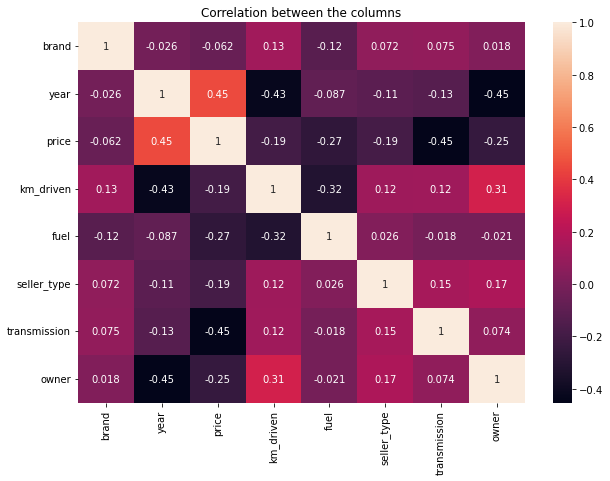

In [31]:
#Correlations between the columns
plt.figure(figsize=(10,7))
sns.heatmap(final.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [32]:
final = final.sample(frac=1).reset_index(drop=True)
X = final.drop(['price'], axis=1)
Y = final['price']
print("Shape of X is: ",X.shape)
print("Shape of y is: ", Y.shape)

Shape of X is:  (10342, 7)
Shape of y is:  (10342,)


In [33]:
#Spliiting the dataset into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X_test:", X_test.shape)
print("X_train:", X_train.shape)
print("Y_test: ", Y_test.shape)
print("Y_train shape:", Y_train.shape)

X_test: (2069, 7)
X_train: (8273, 7)
Y_test:  (2069,)
Y_train shape: (8273,)


In [34]:
#Model 1-1: Linear Regression
linear = LinearRegression()

In [35]:
linear.fit(X_train, Y_train)

LinearRegression()

In [36]:
# R Squared values of Training set
l_train_pred = linear.predict(X_train)
r2_score = metrics.r2_score(Y_train, l_train_pred)
print("Train Data's Accuracy: ", format(linear.score(X_train, Y_train)))
print(f"R Squared value of the training set: {r2_score}")

# R Squared values of Testing set 
l_test_pred = linear.predict(X_test)
r2_score = metrics.r2_score(Y_test, l_test_pred)
print("Test Data's Accuracy: ", format(linear.score(X_test, Y_test)))
print(f"R Squared value of the testing set: {r2_score}")

Train Data's Accuracy:  0.43375950480646874
R Squared value of the training set: 0.43375950480646874
Test Data's Accuracy:  0.40867847455602335
R Squared value of the testing set: 0.40867847455602335


In [37]:
#Cross Validation Score for Training set of Linear Regression Model
cross_val_score(linear,X_train, Y_train, cv = 5)

array([0.43717253, 0.41498818, 0.41235222, 0.44766183, 0.45952374])

In [38]:
#Cross Validation Score for Testing set of Linear Regression Model
cross_val_score(linear,X_test, Y_test, cv = 5)

array([0.48056674, 0.37123416, 0.35079882, 0.40795439, 0.50740495])

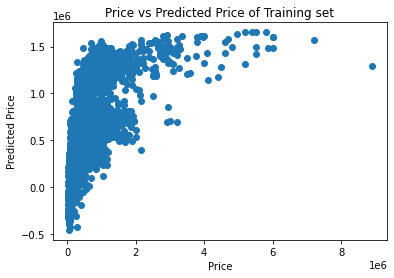

In [39]:
plt.scatter(Y_train, l_train_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Training set")
plt.show()

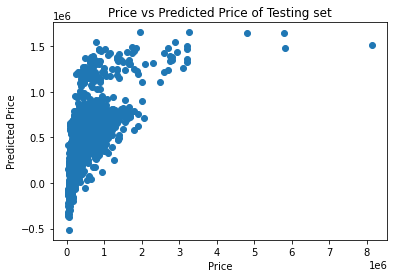

In [40]:
plt.scatter(Y_test, l_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Testing set")
plt.show()

In [41]:
#Model 2-1: Random Forest Regressor
rfr = RandomForestRegressor(random_state= 42)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [42]:
# R Squared values of Training set using Random Forest Regression
rfr_train_pred = rfr.predict(X_train)
r2_score = metrics.r2_score(Y_train, rfr_train_pred)
print("Train Data's Accuracy: ", format(rfr.score(X_train, Y_train)))
print(f"R Squared value of the training set: {r2_score}")

# R Squared values of Testing set using Random Forest Regression
rfr_test_pred = rfr.predict(X_test)
r2_score = metrics.r2_score(Y_test, rfr_test_pred)
print("Test Data's Accuracy: ", format(rfr.score(X_test, Y_test)))
print(f"R Squared value of the testing set: {r2_score}")

Train Data's Accuracy:  0.9420904168428483
R Squared value of the training set: 0.9420904168428483
Test Data's Accuracy:  0.7461639162499896
R Squared value of the testing set: 0.7461639162499896


In [43]:
#Cross Validation Score for Training set of Random Forest Regression Model
cross_val_score(rfr,X_train, Y_train, cv = 5)

array([0.76066971, 0.69059989, 0.77866618, 0.65341776, 0.74324703])

In [44]:
#Cross Validation Score for Testing set of Random Forest Regression Model
cross_val_score(rfr,X_test, Y_test, cv = 5)

array([0.5966991 , 0.60652664, 0.48259465, 0.79610805, 0.62285002])

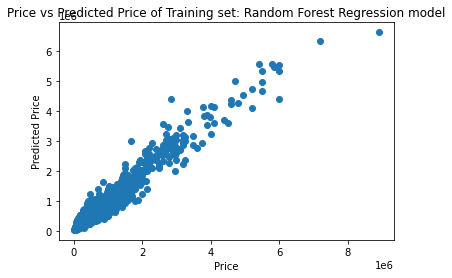

In [45]:
plt.scatter(Y_train, rfr_train_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Training set: Random Forest Regression model")
plt.show()

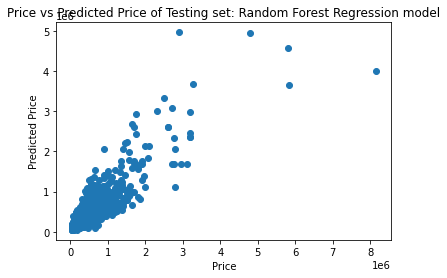

In [46]:
rfr_test_pred = rfr.predict(X_test)
plt.scatter(Y_test, rfr_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Testing set: Random Forest Regression model")
plt.show()

In [47]:
#Due to low accuracy, try Model 1-2: Linear Regression with Pipeline
X = final2.drop(['price'], axis=1)
Y = final2['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

o_h_e = OneHotEncoder()
o_h_e.fit(X[["brand", "year", "km_driven", "fuel", "seller_type", "transmission", "owner"]])
to_columns = make_column_transformer((OneHotEncoder(categories = o_h_e.categories_), ["brand", "year", "km_driven", "fuel", "seller_type", "transmission", "owner"]), remainder="passthrough")

In [48]:
linear = make_pipeline(to_columns, linear)
linear.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17]),
                                                                            array([1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020]),
                                                                            array([     1,   1000,   1001, ..., 560000, 577414, 806599]),
                                                                            array([0, 1, 2, 3]),
                                                                            array([0, 1, 2]),
                                                                     

In [49]:
# R Squared values of the training set using Pipeline
l_train_pred = linear.predict(X_train)
r2_score = metrics.r2_score(Y_train, l_train_pred)
print("Train Data's Accuracy: ", format(linear.score(X_train, Y_train)))
print(f"R Squared value of the training set using Pipeline: {r2_score}")
    
# R Squared values of the testing set using the Pipeline 
l_test_pred = linear.predict(X_test)
r2_score = metrics.r2_score(Y_test, l_test_pred)
print("Test Data's Accuracy: ", format(linear.score(X_test, Y_test)))
print(f"R Squared value of the testing set using Pipeline: {r2_score}")

Train Data's Accuracy:  0.7240680889338698
R Squared value of the training set using Pipeline: 0.7240680889338698
Test Data's Accuracy:  0.5948896594768442
R Squared value of the testing set using Pipeline: 0.5948896594768442


In [50]:
#Cross Validation Score for Training set of Linear Regression Model with Pipeline
cross_val_score(linear,X_test, Y_test, cv = 10)

array([0.69571936, 0.6342141 , 0.4480326 , 0.52119279, 0.6429631 ,
       0.62995099, 0.64293383, 0.5333841 , 0.60698701, 0.47579199])

In [51]:
#Cross Validation Score for Testing set of Linear Regression Model with Pipeline
cross_val_score(linear,X_test, Y_test, cv = 10)

array([0.69571936, 0.6342141 , 0.4480326 , 0.52119279, 0.6429631 ,
       0.62995099, 0.64293383, 0.5333841 , 0.60698701, 0.47579199])

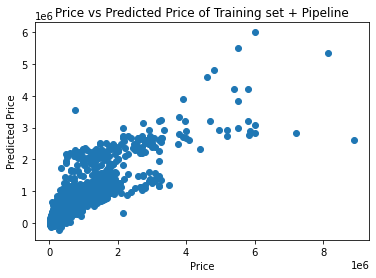

In [52]:
plt.scatter(Y_train, l_train_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Training set + Pipeline")
plt.show()

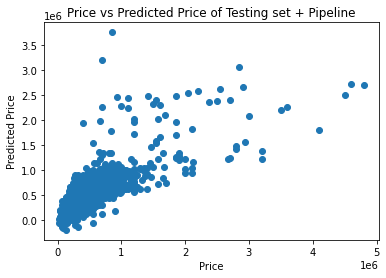

In [53]:
plt.scatter(Y_test, l_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Testing set + Pipeline")
plt.show()

In [54]:
#Model 2-2: Random Forest Regressor with Pipeline
rfr = RandomForestRegressor(random_state= 42)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [55]:
# R Squared values of Training set using Random Forest Regression
rfr_train_pred = rfr.predict(X_train)
r2_score = metrics.r2_score(Y_train, rfr_train_pred)
print("Train Data's Accuracy: ", format(rfr.score(X_train, Y_train)))
print(f"R Squared value of the training set: {r2_score}")

# R Squared values of Testing set using Random Forest Regression
rfr_test_pred = rfr.predict(X_test)
r2_score = metrics.r2_score(Y_test, rfr_test_pred)
print("Test Data's Accuracy: ", format(rfr.score(X_test, Y_test)))
print(f"R Squared value of the testing set: {r2_score}")

Train Data's Accuracy:  0.9445035107275352
R Squared value of the training set: 0.9445035107275352
Test Data's Accuracy:  0.6987387099572093
R Squared value of the testing set: 0.6987387099572093


In [56]:
#Cross Validation Score for Training set of Random Forest Regression Model with Pipeline
cross_val_score(rfr,X_train, Y_train, cv = 5)

array([0.74775624, 0.77405367, 0.72090545, 0.65287188, 0.71592739])

In [57]:
#Cross Validation Score for Testing set of Random Forest Regression Model with Pipeline
cross_val_score(rfr,X_test, Y_test, cv = 5)

array([0.64895445, 0.5600096 , 0.63338456, 0.50569691, 0.67727373])

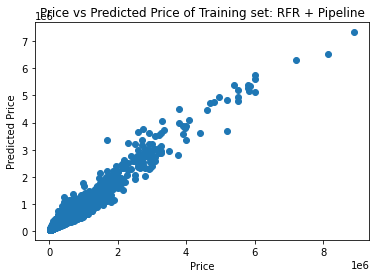

In [58]:
rfr_train_pred = rfr.predict(X_train)
plt.scatter(Y_train, rfr_train_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Training set: RFR + Pipeline")
plt.show()

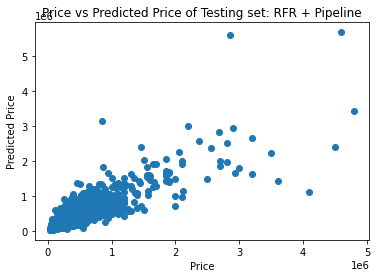

In [59]:
rfr_test_pred = rfr.predict(X_test)
plt.scatter(Y_test, rfr_test_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price of Testing set: RFR + Pipeline")
plt.show()